In [1]:
%pylab inline
import dill as pickle
matplotlib.rcParams.update({'font.size': 14})

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_data(exp_list,key):
    results = []
    for d in exp_list:
        results.append(d[key])
    return results

In [3]:
def get_eval_test(exp_list,key,key_target):
    means = []
    all_vars = []
    for d in exp_list:
        errors = []
        varrs = []
        for idx in range(len(d[key])):
            error = np.linalg.norm((d[key][idx][:,-9:]-d[key_target][idx][-1,-9:]),axis=1)
            errors.append(np.mean(error))
            varrs.append(np.std(error))
        means.append(np.mean(errors))
        all_vars.append(np.mean(varrs))
    return np.array(means),0.65*np.array(all_vars)

In [14]:
num_demo = 1
folder='data_reaching_new'
data_type = 'Reaching'
with open(folder+'/exp_data_irl_no_demos_'+str(num_demo)+'pred-targ.pkl', 'rb') as f:
    exp_data_irl = pickle.load(f)
cost_type = 'fixed'
with open(folder+'/exp_data_ml3_no_demos_'+str(num_demo)+'_'+cost_type+'.pkl', 'rb') as f:
    exp_data_ml3_fixed = pickle.load(f)
cost_type = 'seq'
with open(folder+'/exp_data_ml3_no_demos_'+str(num_demo)+'_'+cost_type+'.pkl', 'rb') as f:
    exp_data_ml3_seq = pickle.load(f)

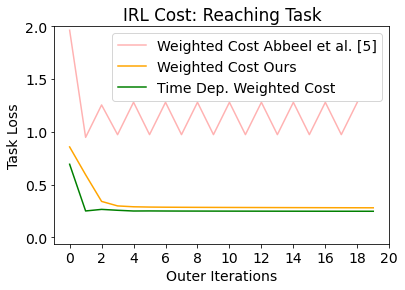

In [17]:
ml3_fixed = get_data(exp_data_ml3_fixed['iters'],'task_loss')
ml3_seq = get_data(exp_data_ml3_seq['iters'],'task_loss')
data_irl = get_data(exp_data_irl['iters'],'task_loss')
#data_rbf = get_data(exp_data_ml3_rbf['iters'],'task_loss')
title('IRL Cost: '+data_type+' Task')
# plot(data_ml3_fixed)
# plot(data_ml3_seq)
# plot(data_irl)
# legend(['ml3 - '+str(num_demo)+' demo','irl - '+str(num_demo)+' demo'])

colors = {}
colors['fixed'] = 'orange'
colors['seq'] = 'green'
colors['irl'] = 'red'
colors['rbf'] = 'green'
categories = {}
categories['fixed'] = 'Weighted Cost Ours'
categories['seq'] = 'Time Dep. Weighted Cost'
categories['irl'] = 'Weighted Cost Abbeel et al. [5]'
categories['rbf'] = 'RBF Weighted Cost'

plt.plot(data_irl, alpha=0.3, color=colors['irl'], label=categories['irl'])
#plt.fill_between(range(len(data_irl)), data_irl-std_irl, data_irl+std_irl, alpha=0.1, color=colors['irl'])

plt.plot(ml3_fixed, alpha=1.0, color=colors['fixed'], label=categories['fixed'])
#plt.fill_between(range(len(ml3_fixed)), ml3_fixed-std_ml3_fixed, ml3_fixed+std_ml3_fixed, alpha=0.1, color=colors['fixed'])

plt.plot(np.array(ml3_seq)-0.03, alpha=1.0, color=colors['seq'], label=categories['seq'])
#plt.fill_between(range(len(ml3_seq)), ml3_seq-std_ml3_seq, ml3_seq+std_ml3_seq, alpha=0.1, color=colors['seq'])

# plt.plot(data_rbf, alpha=1.0, color=colors['rbf'], label=categories['rbf'])
xlabel('Outer Iterations')
ylabel('Task Loss')
legend()
xticks([0,2,4,6,8,10,12,14,16,18,20])
ylim(-0.06,2.0)
savefig('plots_new/'+folder+'comp_task_loss_'+str(num_demo)+'_demo.png')

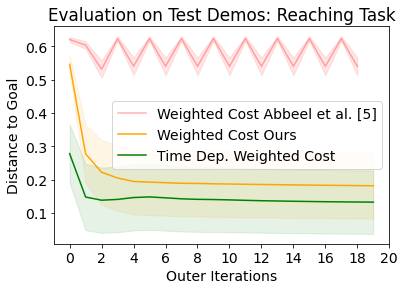

In [16]:
ml3_fixed,std_ml3_fixed = get_eval_test(exp_data_ml3_fixed['iters'],'pred_test_traj','test_traj')
data_irl,std_irl = get_eval_test(exp_data_irl['iters'],'pred_test_traj','test_traj')
ml3_seq, std_ml3_seq = get_eval_test(exp_data_ml3_seq['iters'],'pred_test_traj','test_traj')
#ml3_rbf, std_ml3_rbf = get_eval_test(exp_data_ml3_rbf['iters'],'pred_test_traj','test_traj')

title('Evaluation on Test Demos: '+data_type+' Task')

colors = {}
colors['fixed'] = 'orange'
colors['seq'] = 'green'
colors['irl'] = 'red'
colors['rbf'] = 'green'
categories = {}
categories['fixed'] = 'Weighted Cost Ours'
categories['seq'] = 'Time Dep. Weighted Cost'
categories['irl'] = 'Weighted Cost Abbeel et al. [5]'
categories['rbf'] = 'RBF Weighted Cost'

plt.plot(data_irl, alpha=0.3, color=colors['irl'], label=categories['irl'])
plt.fill_between(range(len(data_irl)), data_irl-std_irl, data_irl+std_irl, alpha=0.1, color=colors['irl'])

plt.plot(ml3_fixed, alpha=1.0, color=colors['fixed'], label=categories['fixed'])
plt.fill_between(range(len(ml3_fixed)), ml3_fixed-std_ml3_fixed, ml3_fixed+std_ml3_fixed, alpha=0.1, color=colors['fixed'])



plt.plot(ml3_seq, alpha=1.0, color=colors['seq'], label=categories['seq'])
plt.fill_between(range(len(ml3_seq)), ml3_seq-std_ml3_seq, ml3_seq+std_ml3_seq, alpha=0.1, color=colors['seq'])

# plt.plot(ml3_rbf, alpha=1.0, color=colors['rbf'], label=categories['rbf'])
# plt.fill_between(range(len(ml3_rbf)), ml3_rbf-std_ml3_rbf, ml3_rbf+std_ml3_rbf, alpha=0.1, color=colors['rbf'])

xlabel('Outer Iterations')
ylabel('Distance to Goal')
xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()
#ylim(0.0,0.5)
savefig('plots_new/'+folder+'_comp_test_eval_'+str(num_demo)+'_demo.png')

(190, 9)
(191, 9)


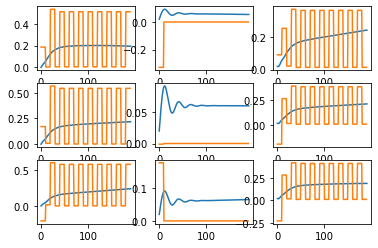

In [105]:
num_demo = 1
import itertools
folder='data_reaching_new'
data_type = 'Reaching'
with open(folder+'/exp_data_irl_no_demos_'+str(num_demo)+'pred-targ.pkl', 'rb') as f:
    exp_data_irl = pickle.load(f)
cost_type = 'fixed'
with open(folder+'/exp_data_ml3_no_demos_'+str(num_demo)+'_'+cost_type+'.pkl', 'rb') as f:
    exp_data_ml3_fixed = pickle.load(f)
cost_type = 'seq'
with open(folder+'/exp_data_ml3_no_demos_'+str(num_demo)+'_'+cost_type+'.pkl', 'rb') as f:
    exp_data_ml3_seq = pickle.load(f)
cost_type = 'rbf'


ml3_fixed = np.array(exp_data_ml3_fixed['weights']).squeeze()
ml3_seq = np.array(exp_data_ml3_seq['weights']).squeeze()
data_irl = exp_data_irl['weights']
data_irl = np.array(list(itertools.chain.from_iterable(itertools.repeat(x, 10) for x in data_irl)))
print(shape(data_irl))
print(shape(ml3_fixed))
for dim in range(9):
    subplot(3,3,dim+1)
    plot(ml3_fixed[:,dim])
    plot(data_irl[:,dim])

In [ ]:
errors_fixed = []
varss_fixed = []
errors_seq = []
varss_seq = []
errors_irl = []
varss_irl = []
for num_demo in range(1,6):
    with open('data_placing/exp_data_irl_no_demos_'+str(num_demo)+'pred-targ.pkl', 'rb') as f:
        exp_data_irl = pickle.load(f)
    with open('data_placing/exp_data_ml3_no_demos_'+str(num_demo)+'_fixed_weights.pkl', 'rb') as f:
        exp_data_ml3_fixed = pickle.load(f)
    with open('data_placing/exp_data_ml3_no_demos_'+str(num_demo)+'_seq_weights.pkl', 'rb') as f:
        exp_data_ml3_seq = pickle.load(f)
        
    ml3_fixed,std_ml3_fixed = get_eval_test(exp_data_ml3_fixed['iters'],'pred_test_traj','test_traj')
    data_irl,std_irl = get_eval_test(exp_data_irl['iters'],'pred_test_traj','test_traj')
    ml3_seq, std_ml3_seq = get_eval_test(exp_data_ml3_seq['iters'],'pred_test_traj','test_traj')
    
    #plot(ml3_fixed)
    errors_fixed.append(min(ml3_fixed))
    idx = argmin(ml3_fixed)
    varss_fixed.append(std_ml3_fixed[idx])
    
    errors_seq.append(min(ml3_seq))
    idx = argmin(ml3_seq)
    varss_seq.append(std_ml3_seq[idx])
    
    errors_irl.append(min(data_irl))
    idx = argmin(data_irl)
    varss_irl.append(std_irl[idx])

colors = {}
colors['fixed'] = 'red'
colors['seq'] = 'orange'
colors['irl'] = 'purple'
categories = {}
categories['fixed'] = 'StructuredKeypointsGoalCostDense'
categories['seq'] = 'StructuredSeqKeypointGoalCostDense'
categories['irl'] = 'Apprenticeship Learning'

errors_fixed=np.array(errors_fixed)
varss_fixed=np.array(varss_fixed)

errors_seq=np.array(errors_seq)
varss_seq=np.array(varss_seq)

errors_irl=np.array(errors_irl)
varss_irl=np.array(varss_irl)

plot(range(1,6),errors_fixed, alpha=1.0, color=colors['fixed'], label=categories['fixed'])
plt.fill_between(range(1,6), errors_fixed-varss_fixed, errors_fixed+varss_fixed, alpha=0.1, color=colors['fixed'])

plot(range(1,6),errors_seq, alpha=1.0, color=colors['seq'], label=categories['seq'])
plt.fill_between(range(1,6), errors_seq-varss_seq, errors_seq+varss_seq, alpha=0.1, color=colors['seq'])


plot(range(1,6),errors_irl, alpha=1.0, color=colors['irl'], label=categories['irl'])
plt.fill_between(range(1,6), errors_irl-varss_irl, errors_irl+varss_irl, alpha=0.1, color=colors['irl'])


plt.legend()

In [ ]:
data_ml3 = get_eval_train(exp_data_ml3['iters'],'train_pred_traj','train_target_traj')
data_irl = get_eval_train(exp_data_irl['iters'],'train_pred_traj','train_target_traj')
title('test eval during train')
plot(data_ml3)
plot(data_irl)
legend(['ml3','irl - '+str(num_demo)+' demo'])
savefig('plots/comp_train_eval_'+str(num_demo)+'_demo.png')

In [ ]:
data_ml3 = get_data(exp_data_ml3['iters'],'pred_loss')
data_irl = get_data(exp_data_irl['iters'],'pred_loss')
title('pred_loss')
plot(data_ml3)
plot(data_irl)
legend(['ml3','irl - '+str(num_demo)+' demo'])
savefig('plots/comp_pred_loss_'+str(num_demo)+'_demo.png')

In [ ]:
def get_eval(exp_list,key,key_target):
    results = []
    for d in exp_list:
        error = np.linalg.norm((d[key][:,-9:]-d[key_target][:,-9:]))
        results.append(error)
    return results

In [ ]:
def get_eval_train(exp_list,key,key_target):
    results = []
    for d in exp_list:
        errors = []
        for idx in range(len(d[key])):
            error = np.linalg.norm((d[key][idx][:,-9:]-d[key_target][idx][:,-9:]),axis=1)
            errors.append(np.mean(error))
        results.append(np.mean(errors))
    return results